<a href="https://colab.research.google.com/github/batu-el/l65_be301_dc755/blob/main/Figure1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install dgl torch_geometric torch

# Install required python libraries
import os

# Install PyTorch Geometric and other libraries
if 'IS_GRADESCOPE_ENV' not in os.environ:
    print("Installing PyTorch Geometric")
    !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
    !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
    !pip install -q torch-geometric
    print("Installing other libraries")
    !pip install networkx
    !pip install lovely-tensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
import os
import sys
import time
import math
import random
import itertools
from datetime import datetime
from typing import Mapping, Tuple, Sequence, List

import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp

from tqdm.notebook import tqdm

import torch
import torch.nn.functional as F
from torch.nn import Embedding, Linear, ReLU, BatchNorm1d, LayerNorm, Module, ModuleList, Sequential
from torch.nn import TransformerEncoder, TransformerEncoderLayer, MultiheadAttention
from torch.optim import Adam

import torch_geometric
from torch_geometric.data import Data, Batch
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import Planetoid

import torch_geometric.transforms as T
from torch_geometric.utils import remove_self_loops, dense_to_sparse, to_dense_batch, to_dense_adj

from torch_geometric.nn import GCNConv, GATConv, GATv2Conv

# from torch_scatter import scatter, scatter_mean, scatter_max, scatter_sum

import lovely_tensors as lt
lt.monkey_patch()

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

print("All imports succeeded.")
print("Python version {}".format(sys.version))
print("PyTorch version {}".format(torch.__version__))
print("PyG version {}".format(torch_geometric.__version__))

/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:72: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


All imports succeeded.
Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
PyTorch version 2.2.1+cu121
PyG version 2.5.1


In [3]:
# Set random seed for deterministic results

def seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed(0)
print("All seeds set.")

All seeds set.


# Datasets

In [342]:
from torch_geometric.datasets import WebKB, WikipediaNetwork

DATASETS = {}

# Chamelion & Squirrel
# Cora & Citeseer
# Cornell & Texas & Wisconsin

## Mid Size Datasets
# Citation Networks
dataset = 'Cora'
dataset = Planetoid('/tmp/Cora', dataset)
data = dataset[0]
DATASETS['Cora'] = data
dataset = 'Citeseer'
dataset = Planetoid('/tmp/Citeseer', dataset)
data = dataset[0]
DATASETS['Citeseer'] = data
# Wikipedia Pages
dataset = 'Chameleon'
dataset = WikipediaNetwork(root='/tmp/Chameleon', name='Chameleon')
data = dataset[0]
DATASETS['Chameleon'] = data
dataset = 'Squirrel'
dataset = WikipediaNetwork(root='/tmp/Squirrel', name='Squirrel')
data = dataset[0]
DATASETS['Squirrel'] = data
### Small Sized Datasets
# Web Pages
dataset = WebKB(root='/tmp/Cornell', name='Cornell')
data = dataset[0]
DATASETS['Cornell'] = data
dataset = WebKB(root='/tmp/Texas', name='Texas')
data = dataset[0]
DATASETS['Texas'] = data
dataset = WebKB(root='/tmp/Wisconsin', name='Wisconsin')
data = dataset[0]
DATASETS['Wisconsin'] = data

In [343]:
# import tqdm
# ### Shortest Paths ###
# def get_shortest_path_matrix(adjacency_matrix):
#     graph = nx.from_numpy_array(adjacency_matrix.cpu().numpy(), create_using=nx.DiGraph)
#     shortest_path_matrix = nx.floyd_warshall_numpy(graph)
#     shortest_path_matrix = torch.tensor(shortest_path_matrix).float()
#     return shortest_path_matrix

# SHORTEST_PATHS = {}
# for data_key in tqdm.tqdm(DATASETS):
#   print(data_key)
#   data = DATASETS[data_key]
#   dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
#   dense_shortest_path_matrix = get_shortest_path_matrix(dense_adj)
#   SHORTEST_PATHS[data_key] = dense_shortest_path_matrix

# ### Save the Shortest Paths
# import pickle
# with open('sp_dict.pkl', 'wb') as f:
#     pickle.dump(SHORTEST_PATHS, f)
# import pickle
# with open('drive/MyDrive/Colab Notebooks/L65_Project/shortest_paths/sp_dict.pkl', 'rb') as f:
#     SHORTEST_PATHS = pickle.load(f)

In [344]:
for data_key in DATASETS:
  data = DATASETS[data_key]
  data.dense_sp_matrix = SHORTEST_PATHS[data_key]
  data.dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
  data.dense_adj = data.dense_adj.cuda() + torch.eye(data.dense_adj.shape[0]).cuda()
  data = T.AddLaplacianEigenvectorPE(k = 16, attr_name = 'pos_enc')(data)
  DATASETS[data_key] = data

In [345]:
### Masks ###

def generate_masks(num_nodes=None,num_runs=None,train_ratio=None, val_ratio=None):
    masks = { 'train_mask': np.zeros((num_nodes, num_runs), dtype=int),
              'val_mask': np.zeros((num_nodes, num_runs), dtype=int),
              'test_mask': np.zeros((num_nodes, num_runs), dtype=int)}

    for run in range(num_runs):
        indices = np.arange(num_nodes)
        np.random.shuffle(indices)
        train_end = int(train_ratio * num_nodes)
        val_end = train_end + int(val_ratio * num_nodes)
        masks['train_mask'][indices[:train_end], run] = 1
        masks['val_mask'][indices[train_end:val_end], run] = 1
        masks['test_mask'][indices[val_end:], run] = 1

    tensor_masks = {'train_mask': torch.tensor(masks['train_mask']),
                    'val_mask':torch.tensor(masks['val_mask']),
                    'test_mask':torch.tensor(masks['test_mask'])}
    return tensor_masks

for data_key in DATASETS:
    data = DATASETS[data_key]

    masks = generate_masks(num_nodes=data.x.shape[0], num_runs=10, train_ratio=0.4, val_ratio=0.3)
    data.train_mask = masks['train_mask']
    data.val_mask = masks['val_mask']
    data.test_mask = masks['test_mask']

    if len(data.train_mask.shape)==1:
      print('Add 10 Masks')
    else:
      print('We have 10 Masks')
      print('Train Ratio:',(data.train_mask[:,0].sum() / len(data.train_mask[:,0])).item())
      print('Val Ratio:',(data.val_mask[:,0].sum() / len(data.val_mask[:,0])).item())
      print('Test Ratio:',(data.test_mask[:,0].sum() / len(data.test_mask[:,0])).item())

We have 10 Masks
Train Ratio: 0.39992615580558777
Val Ratio: 0.29985228180885315
Test Ratio: 0.3002215623855591
We have 10 Masks
Train Ratio: 0.39975953102111816
Val Ratio: 0.29996994137763977
Test Ratio: 0.30027052760124207
We have 10 Masks
Train Ratio: 0.39964866638183594
Val Ratio: 0.2999560832977295
Test Ratio: 0.30039525032043457
We have 10 Masks
Train Ratio: 0.39992308616638184
Val Ratio: 0.2999423146247864
Test Ratio: 0.3001345992088318
We have 10 Masks
Train Ratio: 0.3989070951938629
Val Ratio: 0.2950819730758667
Test Ratio: 0.3060109317302704
We have 10 Masks
Train Ratio: 0.3989070951938629
Val Ratio: 0.2950819730758667
Test Ratio: 0.3060109317302704
We have 10 Masks
Train Ratio: 0.39840638637542725
Val Ratio: 0.29880478978157043
Test Ratio: 0.3027888536453247


In [346]:
DATASETS['Cora']

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708, 10], val_mask=[2708, 10], test_mask=[2708, 10], dense_sp_matrix=[2708, 2708], dense_adj=[2708, 2708], pos_enc=[2708, 16])

# Models

In [347]:
# PyG example code: https://github.com/pyg-team/pytorch_geometric/blob/master/examples/gcn2_cora.py

class GNNModel(Module):

    def __init__(
            self,
            in_dim: int = data.x.shape[-1],
            hidden_dim: int = 128,
            num_heads: int = 1,
            num_layers: int = 1,
            out_dim: int = len(data.y.unique()),
            dropout: float = 0.5,
        ):
        super().__init__()

        self.lin_in = Linear(in_dim, hidden_dim)
        self.lin_out = Linear(hidden_dim, out_dim)
        self.layers = ModuleList()

        for layer in range(num_layers):
            self.layers.append(
                GCNConv(hidden_dim, hidden_dim)
            )
        self.dropout = dropout

    def forward(self, x, edge_index):

        x = self.lin_in(x)

        for layer in self.layers:
            # conv -> activation ->  dropout -> residual
            x_in = x
            x = layer(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            x = x_in + x

        x = self.lin_out(x)

        return x.log_softmax(dim=-1)


class SparseGraphTransformerModel(Module):
    def __init__(
            self,
            in_dim: int = data.x.shape[-1],
            hidden_dim: int = 128,
            num_heads: int = 1,
            num_layers: int = 1,
            out_dim: int = len(data.y.unique()),
            dropout: float = 0.5,
        ):
        super().__init__()

        self.lin_in = Linear(in_dim, hidden_dim)
        self.lin_out = Linear(hidden_dim, out_dim)

        self.layers = ModuleList()
        for layer in range(num_layers):
            self.layers.append(
                MultiheadAttention(
                    embed_dim = hidden_dim,
                    num_heads = num_heads,
                    dropout = dropout
                )
            )
        self.dropout = dropout

    def forward(self, x, dense_adj):

        x = self.lin_in(x)

        self.attn_weights_list = []

        for layer in self.layers:
            x_in = x
            x, attn_weights = layer(
                x, x, x,
                attn_mask = ~dense_adj.bool(),
                average_attn_weights = False
            )
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            x = x_in + x

            self.attn_weights_list.append(attn_weights)

        x = self.lin_out(x)

        return x.log_softmax(dim=-1)

class DenseGraphTransformerModel(Module):

    def __init__(
            self,
            in_dim: int = data.x.shape[-1],
            pos_enc_dim: int = 16,
            hidden_dim: int = 128,
            num_heads: int = 1,
            num_layers: int = 1,
            out_dim: int = len(data.y.unique()),
            dropout: float = 0.5,
        ):
        super().__init__()

        self.lin_in = Linear(in_dim, hidden_dim)
        self.lin_pos_enc = Linear(pos_enc_dim, hidden_dim)
        self.lin_out = Linear(hidden_dim, out_dim)

        self.layers = ModuleList()
        for layer in range(num_layers):
            self.layers.append(
                MultiheadAttention(
                    embed_dim = hidden_dim,
                    num_heads = num_heads,
                    dropout = dropout
                )
            )


        self.attn_bias_scale = torch.nn.Parameter(torch.tensor([10.0]))  # controls how much we initially bias our model to nearby nodes
        self.dropout = dropout

    def forward(self, x, pos_enc, dense_sp_matrix):

        # x = self.lin_in(x) + self.lin_pos_enc(pos_enc)
        x = self.lin_in(x)  # no node positional encoding

        # attention bias
        # [i, j] -> inverse of shortest path distance b/w node i and j
        # diagonals -> self connection, set to 0
        # disconnected nodes -> -1
        attn_bias = self.attn_bias_scale * torch.nan_to_num(
            (1 / (torch.nan_to_num(dense_sp_matrix, nan=-1, posinf=-1, neginf=-1))),
            nan=0, posinf=0, neginf=0
        )
        #attn_bias = torch.ones_like(attn_bias)

        # TransformerEncoder
        # x = self.encoder(x, mask = attn_bias)

        self.attn_weights_list = []

        for layer in self.layers:
            # MHSA layer
            # float mask adds learnable additive attention bias
            x_in = x
            x, attn_weights = layer(
                x, x, x,
                attn_mask = attn_bias,
                average_attn_weights = False
            )
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            x = x_in + x

            self.attn_weights_list.append(attn_weights)

        x = self.lin_out(x)

        return x.log_softmax(dim=-1)



class DenseGraphTransformerModel_V2(Module):

    def __init__(
            self,
            in_dim: int = data.x.shape[-1],
            pos_enc_dim: int = 16,
            hidden_dim: int = 128,
            num_heads: int = 1,
            num_layers: int = 1,
            out_dim: int = len(data.y.unique()),
            dropout: float = 0.5,
        ):
        super().__init__()

        self.lin_in = Linear(in_dim, hidden_dim)
        self.lin_pos_enc = Linear(pos_enc_dim, hidden_dim)
        self.lin_out = Linear(hidden_dim, out_dim)

        self.layers = ModuleList()
        for layer in range(num_layers):
            self.layers.append(
                MultiheadAttention(
                    embed_dim = hidden_dim,
                    num_heads = num_heads,
                    dropout = dropout
                )
            )


        self.attn_bias_scale = torch.nn.Parameter(torch.tensor([10.0]))  # controls how much we initially bias our model to nearby nodes
        self.dropout = dropout

    def forward(self, x, pos_enc, dense_sp_matrix):

        x = self.lin_in(x) + self.lin_pos_enc(pos_enc)
        # x = self.lin_in(x)  # no node positional encoding

        # attention bias
        # [i, j] -> inverse of shortest path distance b/w node i and j
        # diagonals -> self connection, set to 0
        # disconnected nodes -> -1
        # attn_bias = self.attn_bias_scale * torch.nan_to_num(
        #     (1 / (torch.nan_to_num(dense_sp_matrix, nan=-1, posinf=-1, neginf=-1))),
        #     nan=0, posinf=0, neginf=0
        # )
        #attn_bias = torch.ones_like(attn_bias)

        # TransformerEncoder
        # x = self.encoder(x, mask = attn_bias)

        self.attn_weights_list = []

        for layer in self.layers:
            # # TransformerEncoderLayer
            # # float mask adds learnable additive attention bias
            # x = layer(x, src_mask = attn_bias)

            # MHSA layer
            # float mask adds learnable additive attention bias
            x_in = x
            x, attn_weights = layer(
                x, x, x,
                # attn_mask = attn_bias,
                average_attn_weights = False
            )
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            x = x_in + x

            self.attn_weights_list.append(attn_weights)

        x = self.lin_out(x)

        return x.log_softmax(dim=-1)

# Trainers

In [348]:
def Train_GCN(NUM_LAYERS,
              NUM_HEADS,
              data):

    IN_DIM = data.x.shape[-1]
    OUT_DIM = len(data.y.unique())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = GNNModel(num_layers=NUM_LAYERS, num_heads=NUM_HEADS, in_dim=IN_DIM,out_dim=OUT_DIM).to(device)
    data = data.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    def train():
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        return float(loss)

    @torch.no_grad()
    def test():
        model.eval()
        pred, accs = model(data.x, data.edge_index).argmax(dim=-1), []
        for _, mask in data('train_mask', 'val_mask', 'test_mask'):
            accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
        return accs

    best_val_acc = test_acc = 0
    times = []
    for epoch in range(1, 100):
        start = time.time()
        loss = train()
        train_acc, val_acc, tmp_test_acc = test()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            test_acc = tmp_test_acc
        # print(f'Epoch: {epoch:04d}, Loss: {loss:.4f} Train: {train_acc:.4f}, '
        #       f'Val: {val_acc:.4f}, Test: {tmp_test_acc:.4f}, '
        #       f'Final Test: {test_acc:.4f}')
        times.append(time.time() - start)
    # print(f"Median time per epoch: {torch.tensor(times).median():.4f}s")
    return {'train_acc':train_acc,'val_acc':val_acc,'test_acc':test_acc}, None

def Train_SparseGraphTransformerModel(NUM_LAYERS,
              NUM_HEADS,
              data):

    IN_DIM = data.x.shape[-1]
    OUT_DIM = len(data.y.unique())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = SparseGraphTransformerModel(num_layers=NUM_LAYERS, num_heads=NUM_HEADS, in_dim=IN_DIM,out_dim=OUT_DIM).to(device)
    data = data.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    def train():
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.dense_adj)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        return float(loss)

    @torch.no_grad()
    def test():
        model.eval()
        pred, accs = model(data.x, data.dense_adj).argmax(dim=-1), []
        for _, mask in data('train_mask', 'val_mask', 'test_mask'):
            accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
        return accs

    best_val_acc = test_acc = 0
    times = []
    for epoch in range(1, 100):
        start = time.time()
        loss = train()
        train_acc, val_acc, tmp_test_acc = test()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            test_acc = tmp_test_acc
        # print(f'Epoch: {epoch:04d}, Loss: {loss:.4f} Train: {train_acc:.4f}, '
        #       f'Val: {val_acc:.4f}, Test: {tmp_test_acc:.4f}, '
        #       f'Final Test: {test_acc:.4f}')
        times.append(time.time() - start)
    # print(f"Median time per epoch: {torch.tensor(times).median():.4f}s")
    return {'train_acc':train_acc,'val_acc':val_acc,'test_acc':test_acc}, model.attn_weights_list

def Train_DenseGraphTransformerModel(NUM_LAYERS,
              NUM_HEADS,
              data):

    IN_DIM = data.x.shape[-1]
    OUT_DIM = len(data.y.unique())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = DenseGraphTransformerModel(num_layers=NUM_LAYERS, num_heads=NUM_HEADS, in_dim=IN_DIM,out_dim=OUT_DIM).to(device)
    data = data.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    def train():
        model.train()
        optimizer.zero_grad()
        # print(data.pos_enc)
        out = model(data.x, data.pos_enc, data.dense_sp_matrix)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        return float(loss)


    @torch.no_grad()
    def test():
        model.eval()
        pred, accs = model(data.x, data.pos_enc, data.dense_sp_matrix).argmax(dim=-1), []
        for _, mask in data('train_mask', 'val_mask', 'test_mask'):
            accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
        return accs


    best_val_acc = test_acc = 0
    times = []
    for epoch in range(1, 100):
        start = time.time()
        loss = train()
        train_acc, val_acc, tmp_test_acc = test()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            test_acc = tmp_test_acc
        # print(f'Epoch: {epoch:04d}, Loss: {loss:.4f} Train: {train_acc:.4f}, '
        #       f'Val: {val_acc:.4f}, Test: {tmp_test_acc:.4f}, '
        #       f'Final Test: {test_acc:.4f}')
        times.append(time.time() - start)
    # print(f"Median time per epoch: {torch.tensor(times).median():.4f}s")
    return {'train_acc':train_acc,'val_acc':val_acc,'test_acc':test_acc}, model.attn_weights_list

    # Notes
    # - Dense Transformer needs to be trained for a bit longer to reach low loss value
    # - Node positional encodings are not particularly useful
    # - Edge distance encodings are very useful
    # - Since Cora is highly homophilic, it is important to bias the attention towards nearby nodes

def Train_DenseGraphTransformerModel_V2(NUM_LAYERS,
              NUM_HEADS,
              data):

    IN_DIM = data.x.shape[-1]
    OUT_DIM = len(data.y.unique())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = DenseGraphTransformerModel_V2(num_layers=NUM_LAYERS, num_heads=NUM_HEADS, in_dim=IN_DIM,out_dim=OUT_DIM).to(device)
    data = data.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    def train():
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.pos_enc, data.dense_sp_matrix)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        return float(loss)

    @torch.no_grad()
    def test():
        model.eval()
        pred, accs = model(data.x, data.pos_enc, data.dense_sp_matrix).argmax(dim=-1), []
        for _, mask in data('train_mask', 'val_mask', 'test_mask'):
            accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
        return accs

    best_val_acc = test_acc = 0
    times = []
    for epoch in range(1, 100):
        start = time.time()
        loss = train()
        train_acc, val_acc, tmp_test_acc = test()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            test_acc = tmp_test_acc
        print(f'Epoch: {epoch:04d}, Loss: {loss:.4f} Train: {train_acc:.4f}, '
              f'Val: {val_acc:.4f}, Test: {tmp_test_acc:.4f}, '
              f'Final Test: {test_acc:.4f}')
        times.append(time.time() - start)
    # print(f"Median time per epoch: {torch.tensor(times).median():.4f}s")
    return {'train_acc':train_acc,'val_acc':val_acc,'test_acc':test_acc}, model.attn_weights_list

    # Notes
    # - Dense Transformer needs to be trained for a bit longer to reach low loss value
    # - Node positional encodings are not particularly useful
    # - Edge distance encodings are very useful
    # - Since Cora is highly homophilic, it is important to bias the attention towards nearby nodes

# Training

In [349]:
### Train Cora ###
NUM_LAYERS = 1
NUM_HEADS = 1
NUM_RUNS = 10
# data_key = 'Wisconsin'
all_stats = {}
for data_key in DATASETS:
    print(f'Training on {data_key}')
    data = DATASETS[data_key]

    TRAIN_MASKS = data.train_mask
    VAL_MASKS = data.val_mask
    TEST_MASKS = data.test_mask

    run_stats = {}

    for mask_idx in tqdm.tqdm(range(NUM_RUNS)):
        data.train_mask = TRAIN_MASKS[:,mask_idx]
        data.val_mask = VAL_MASKS[:,mask_idx]
        data.test_mask = TEST_MASKS[:,mask_idx]

        accuracy_statistics = {}
        attn_weights = {}

        accuracy_statistics['GCN'], attn_weights['GCN'] = Train_GCN(NUM_LAYERS, NUM_HEADS, data)
        accuracy_statistics['SparseGraphTransformerModel'] , attn_weights['SparseGraphTransformerModel'] = Train_SparseGraphTransformerModel(NUM_LAYERS, NUM_HEADS, data)
        accuracy_statistics['DenseGraphTransformerModel'] , attn_weights['DenseGraphTransformerModel'] = Train_DenseGraphTransformerModel(NUM_LAYERS, NUM_HEADS, data)
        accuracy_statistics['DenseGraphTransformerModel_V2'] , attn_weights['DenseGraphTransformerModel_V2'] = Train_DenseGraphTransformerModel_V2(NUM_LAYERS, NUM_HEADS, data)
        run_stats[mask_idx] = {'accuracy': accuracy_statistics,
                              'attentions': attn_weights}
    all_stats[data_key] = run_stats
    data.train_mask = TRAIN_MASKS
    data.val_mask = VAL_MASKS
    data.test_mask = TEST_MASKS

Training on Cora


  0%|          | 0/10 [00:00<?, ?it/s]

tensor 0.400


SystemExit: 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [327]:
all_stats['Cora'][0]['attentions']['SparseGraphTransformerModel'][0][0].cpu().numpy()

array([[0.28004393, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.26722106, 0.22479795, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16245243, 0.16671936, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.49980482, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.20004381,
        0.19926256],
       [0.        , 0.        , 0.        , ..., 0.        , 0.20042647,
        0.1991029 ]], dtype=float32)

In [316]:
### Accuracy Statistics ###
### Table 1 ###
all_stats_df = {}
for data_key in all_stats:
  run_stats = all_stats[data_key]
  table1 = pd.concat({key : pd.DataFrame(run_stats[key]['accuracy']) for key in run_stats}, axis=0)
  table1_train = pd.concat({'mean': table1.mean(level=1, axis=0).loc['train_acc'], 'std':table1.std(level=1).loc['train_acc']}, axis=1)
  table1_test = pd.concat({'mean': table1.mean(level=1, axis=0).loc['test_acc'], 'std':table1.std(level=1).loc['test_acc']}, axis=1)
  table1 = pd.concat({'Train': table1_train, 'Test': table1_test}, axis=1)
  all_stats_df[data_key] = table1
pd.concat(all_stats_df, axis=1)

<ipython-input-316-c6d22e6c6f39>:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  table1_train = pd.concat({'mean': table1.mean(level=1, axis=0).loc['train_acc'], 'std':table1.std(level=1).loc['train_acc']}, axis=1)
<ipython-input-316-c6d22e6c6f39>:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.var(level=1) should use df.groupby(level=1).var().
  table1_train = pd.concat({'mean': table1.mean(level=1, axis=0).loc['train_acc'], 'std':table1.std(level=1).loc['train_acc']}, axis=1)
<ipython-input-316-c6d22e6c6f39>:8: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).

Cora                      Citeseer       \
                                  Train           Test          Train        
                                   mean  std      mean  std      mean  std   
GCN                            2.500462  0.0  3.330873  0.0  2.501504  0.0   
SparseGraphTransformerModel    2.500462  0.0  3.330873  0.0  2.501504  0.0   
DenseGraphTransformerModel     2.500462  0.0  3.330873  0.0  2.501504  0.0   
DenseGraphTransformerModel_V2  2.500462  0.0  3.330873  0.0  2.501504  0.0   

                                            Chameleon       ...   Cornell  \
                                  Test          Train       ...      Test   
                                  mean  std      mean  std  ...      mean   
GCN                            3.33033  0.0  2.502198  0.0  ...  3.267857   
SparseGraphTransformerModel    3.33033  0.0  2.502198  0.0  ...  3.267857   
DenseGraphTransformerModel     3.33033  0.0  2.502198  0.0  ...  3.267857   
DenseGraphTransformerModel_V2  3.33033  0.0  2.502198  0.0  ...  3.267857   

                                       Texas                     Wisconsin  \
                                       Train           Test          Train   
                               std      mean  std      mean  std      mean   
GCN                            0.0  2.506849  0.0  3.267857  0.0      2.51   
SparseGraphTransformerModel    0.0  2.506849  0.0  3.267857  0.0      2.51   
DenseGraphTransformerModel     0.0  2.506849  0.0  3.267857  0.0      2.51   
DenseGraphTransformerModel_V2  0.0  2.506849  0.0  3.267857  0.0      2.51   

                                                   
                                        Test       
                               std      mean  std  
GCN                            0.0  3.302632  0.0  
SparseGraphTransformerModel    0.0  3.302632  0.0  
DenseGraphTransformerModel     0.0  3.302632  0.0  
DenseGraphTransformerModel_V2  0.0  3.302632  0.0  

[4 rows x 28 columns]

In [170]:
### Homophily Levels ###
### Table 2 ###

Homophily_Levels = {}

for data_key in DATASETS:
  data = DATASETS[data_key]
  edge_index_tensor = torch.tensor(data.edge_index.cpu().numpy(), dtype=torch.long)
  g = dgl.graph((edge_index_tensor[0], edge_index_tensor[1]), num_nodes=data.x.shape[0])
  g.ndata['y'] = torch.tensor(data.y.cpu().numpy(), dtype=torch.long)
  Homophily_Levels[data_key] = {'Node Homophily':dgl.node_homophily(g, g.ndata['y']),
                                'Edge Homophily':dgl.edge_homophily(g, g.ndata['y']),
                                'Adjusted Homophily':dgl.adjusted_homophily(g, g.ndata['y'])
                                }
pd.DataFrame(Homophily_Levels)

,Cora,Cornell,Texas,Wisconsin
Node Homophily,0.825158,0.105744,0.065398,0.171916
Edge Homophily,0.809966,0.130872,0.107692,0.196117
Adjusted Homophily,0.771085,-0.211433,-0.258719,-0.152409


In [ ]:
### Figure 1 ###

for data_key in DATASETS
  attn = attn_weights[data_key][0].cpu().numpy()[0]
  sp = data.dense_sp_matrix.cpu().numpy()
  sp[sp == np.inf] = np.nan
  adj = data.dense_adj.cpu().numpy()
  adj + np.eye(adj.shape[0])



In [100]:
import dgl
import torch

# Assuming edge_index is a NumPy array or a similar structure where
# each column [u, v] represents an edge from node u to node v.
# Also assuming x is a feature matrix where each row corresponds to node features.

# Convert edge_index to a tensor

# Create a DGL graph

# Add node features
g.ndata['x'] = torch.tensor(data.x.cpu().numpy(), dtype=torch.float)

# If y, train_mask, val_mask, test_mask are provided, they can also be added
g.ndata['train_mask'] = torch.tensor(data.train_mask.cpu().numpy(), dtype=torch.bool)
g.ndata['val_mask'] = torch.tensor(data.val_mask.cpu().numpy(), dtype=torch.bool)
g.ndata['test_mask'] = torch.tensor(data.test_mask.cpu().numpy(), dtype=torch.bool)

# If you need to use the dense adjacency matrix directly
# Note: DGL works with sparse matrices for efficiency, so typically you wouldn't convert to dense
dense_adj_tensor = torch.tensor(dense_adj, dtype=torch.float)

<ipython-input-100-4b03353be905>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dense_adj_tensor = torch.tensor(dense_adj, dtype=torch.float)


0.825157880783081

In [102]:
attn.shape

(2708, 2708)

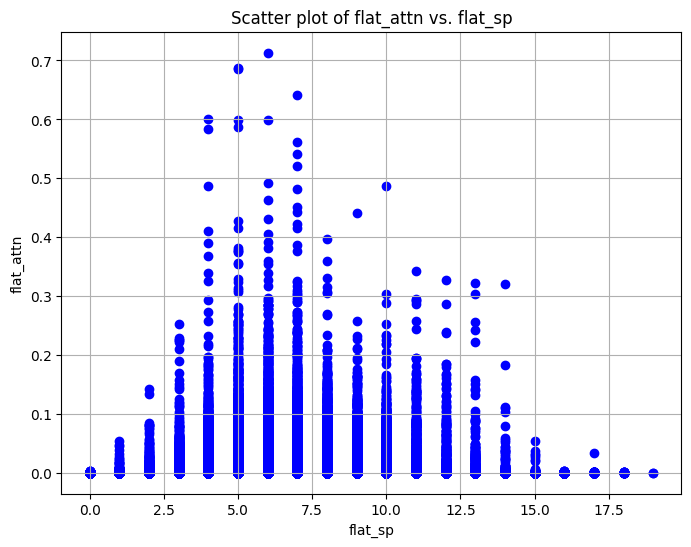

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sp, attn, color='blue')
plt.title('Scatter plot of flat_attn vs. flat_sp')
plt.xlabel('flat_sp')
plt.ylabel('flat_attn')
plt.grid(True)
plt.show()

In [91]:
attn[adj == 0].mean(), attn[adj == 1].mean()

(9.674604e-05, 0.18942371)

In [40]:
flat_attn.shape, flat_sp.shape

((7333264,), (7333264,))

,GCN,SparseGraphTransformerModel,DenseGraphTransformerModel,DenseGraphTransformerModel_V2
train_acc,1.000,1.000,1.000,1.000
val_acc,0.710,0.752,0.748,0.394
test_acc,0.709,0.758,0.743,0.529


In [ ]:


NUM_LAYERS = 1
NUM_HEADS = 1
IN_DIM = data.x.shape[-1]
OUT_DIM = len(data.y.unique())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

MODELS = {
    'GNNModel': GNNModel(num_layers = NUM_LAYERS, num_heads = NUM_HEADS, in_dim = IN_DIM, out_dim = OUT_DIM).to(device),
    'SparseGraphTransformerModel': SparseGraphTransformerModel(num_layers = NUM_LAYERS, num_heads = NUM_HEADS, in_dim = IN_DIM, out_dim = OUT_DIM).to(device),
    'DenseGraphTransformerModel': DenseGraphTransformerModel(num_layers = NUM_LAYERS, num_heads = NUM_HEADS, in_dim = IN_DIM, out_dim = OUT_DIM).to(device),
    'DenseGraphTransformerModel_V2': DenseGraphTransformerModel_V2(num_layers = NUM_LAYERS, num_heads = NUM_HEADS, in_dim = IN_DIM, out_dim = OUT_DIM).to(device)
          }


data = T.AddLaplacianEigenvectorPE(k = 16, attr_name = 'pos_enc')(data)
data.dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
data.dense_sp_matrix = dense_shortest_path_matrix.float()  # pre-computed in previous cell


model =



